Sure, I can help you analyze your new dataset and create a correlation matrix. Please follow these steps:

1. Load the dataset into a pandas DataFrame.
2. Compute the correlation matrix.
3. Visualize the correlation matrix using a heatmap.

Here's a step-by-step guide:

### Step 1: Load the Dataset
Assuming your dataset is in a CSV file, you can load it using `pandas`.



In [20]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('./archive/student-por.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [22]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000




### Step 2: Compute the Correlation Matrix
Compute the correlation matrix using the `corr` method.



In [23]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)



### Step 3: Visualize the Correlation Matrix
Use `seaborn` to create a heatmap of the correlation matrix.



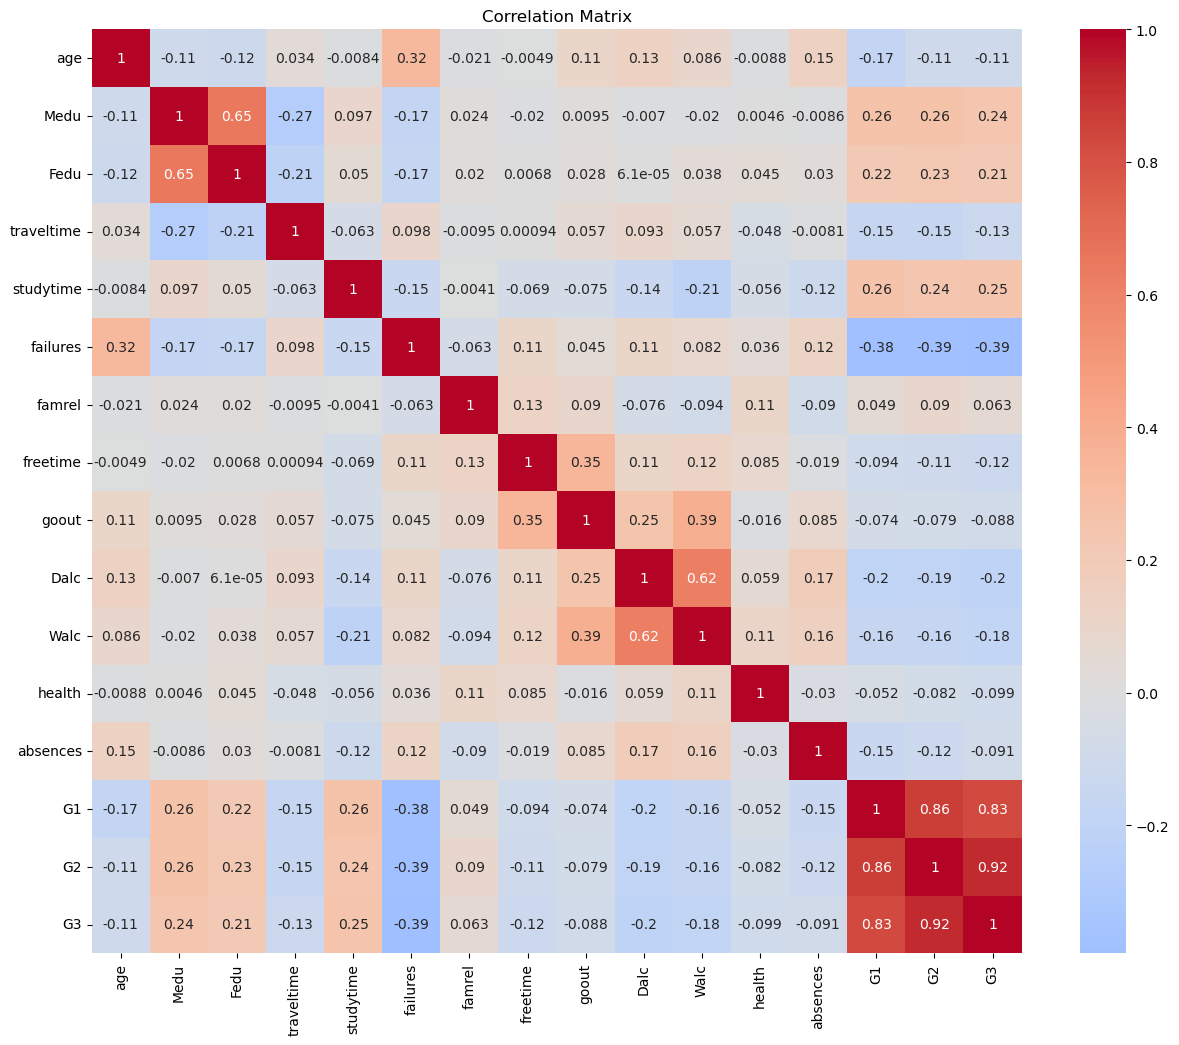

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=np.array((10, 8)) * 1.5)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [25]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Extract the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the matrix to convert it into a series and drop NaN values
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).head(15)

# Adjust display options to avoid truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the sorted pairs
print(sorted_pairs)

G3        G2           0.918548
G2        G1           0.864982
G3        G1           0.826387
Fedu      Medu         0.647477
Walc      Dalc         0.616561
          goout        0.388680
goout     freetime     0.346352
failures  age          0.319968
G2        Medu         0.264035
G1        studytime    0.260875
          Medu         0.260472
G3        studytime    0.249789
Dalc      goout        0.245126
G2        studytime    0.240498
G3        Medu         0.240151
dtype: float64


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# List of top correlated pairs
top_pairs = [
    ('G3', 'G2'),
    ('G2', 'G1'),
    ('G3', 'G1'),
    ('Walc', 'Dalc'),
    ('Fedu', 'Medu'),
    ('Walc', 'goout'),
    ('goout', 'freetime'),
    ('Dalc', 'goout'),
    ('failures', 'age'),
    ('G3', 'Medu'),
    ('G2', 'Medu'),
    ('Dalc', 'freetime'),
    ('G1', 'Medu'),
    ('G1', 'Fedu'),
    ('absences', 'age')
]


<Figure size 300x200 with 0 Axes>

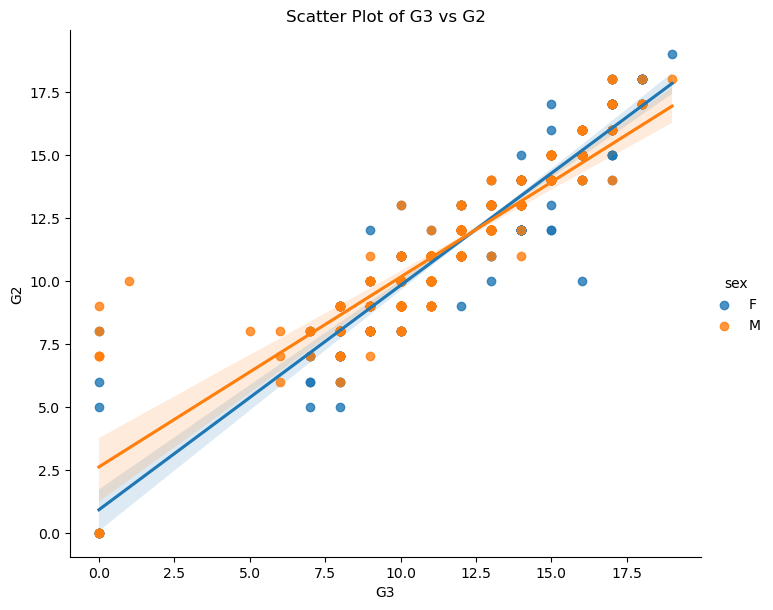

<Figure size 300x200 with 0 Axes>

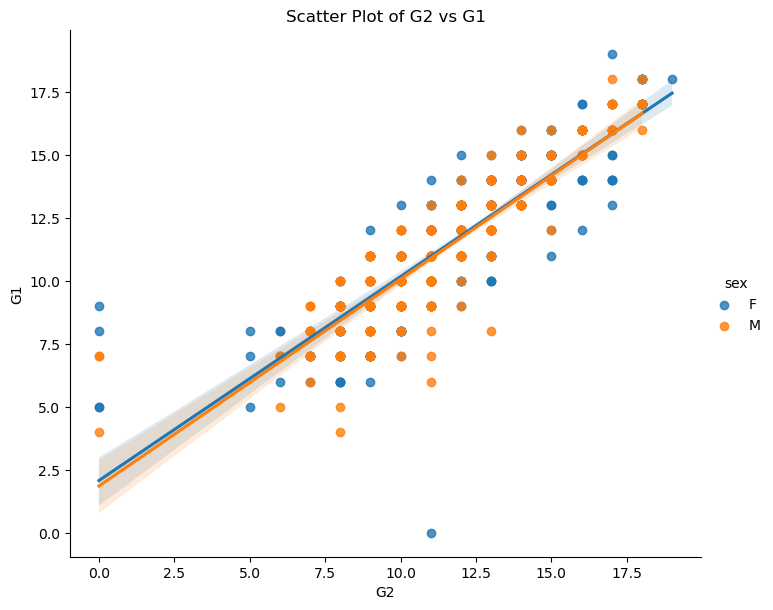

<Figure size 300x200 with 0 Axes>

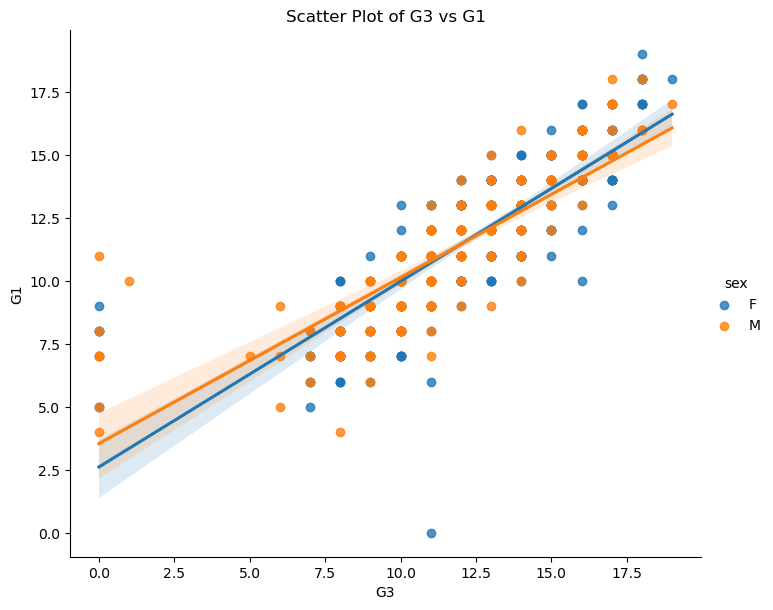

<Figure size 300x200 with 0 Axes>

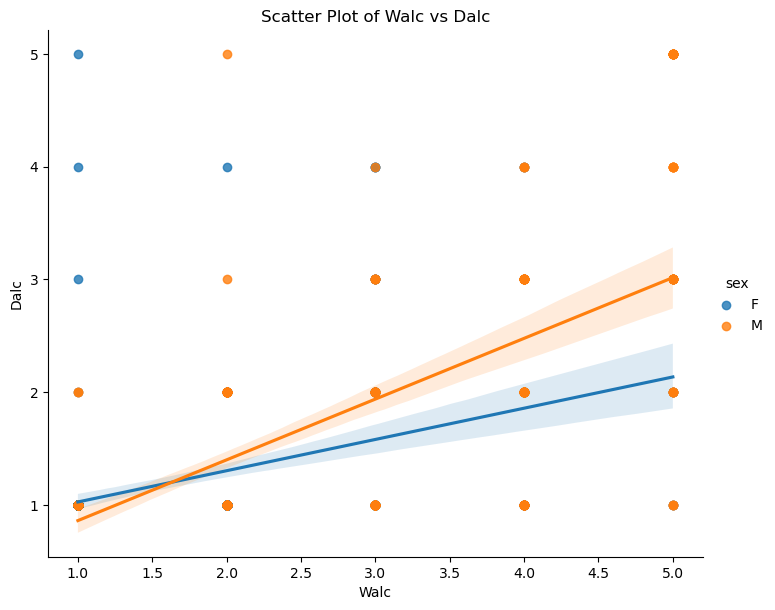

<Figure size 300x200 with 0 Axes>

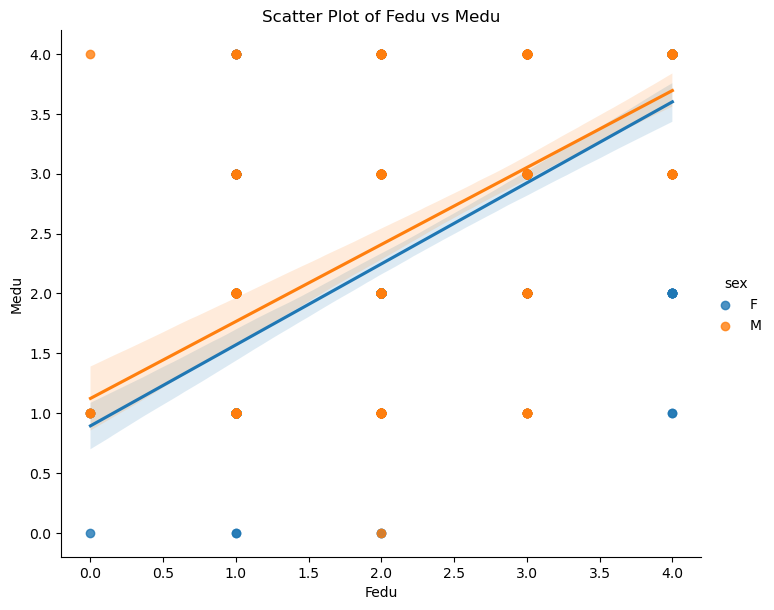

<Figure size 300x200 with 0 Axes>

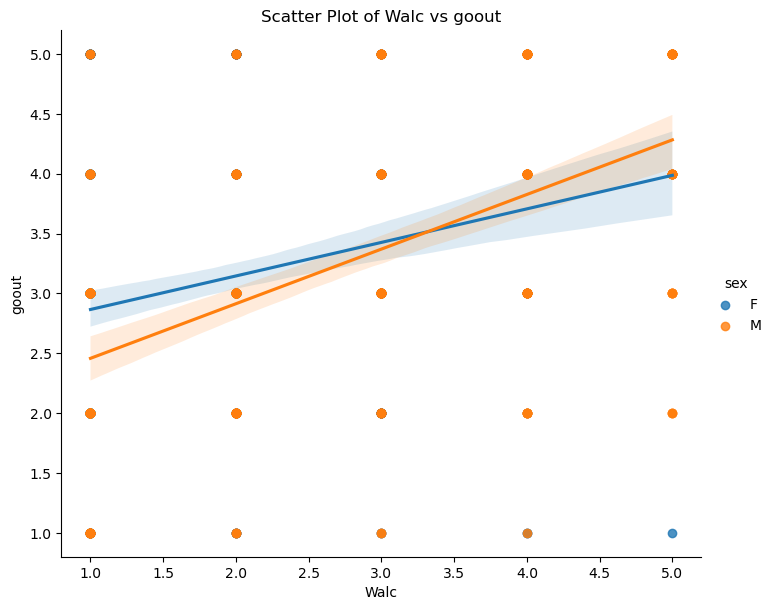

<Figure size 300x200 with 0 Axes>

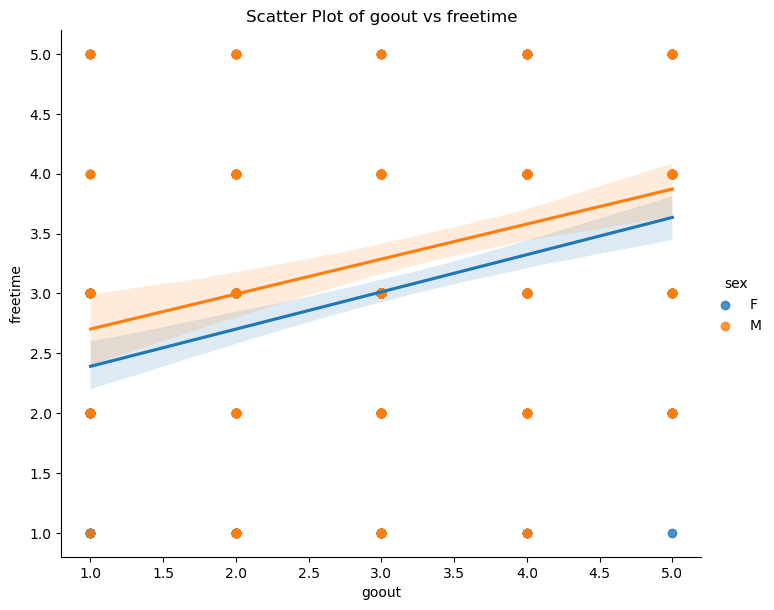

<Figure size 300x200 with 0 Axes>

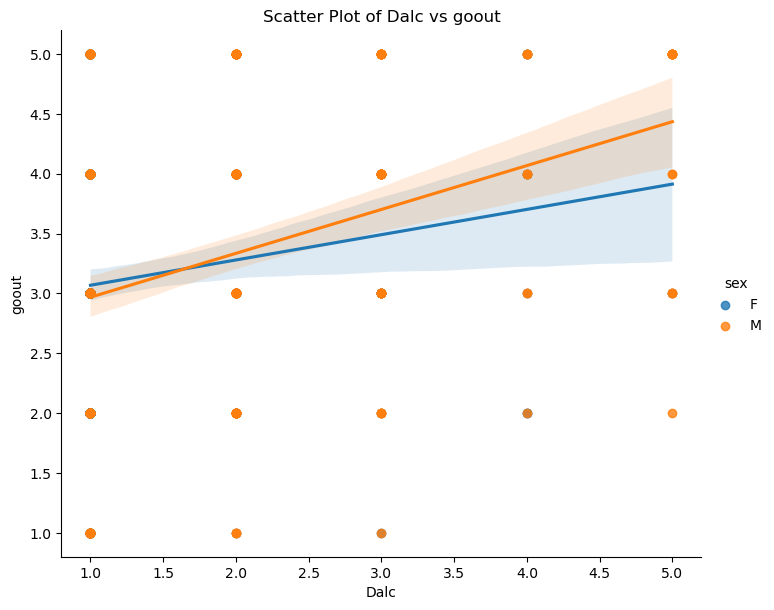

<Figure size 300x200 with 0 Axes>

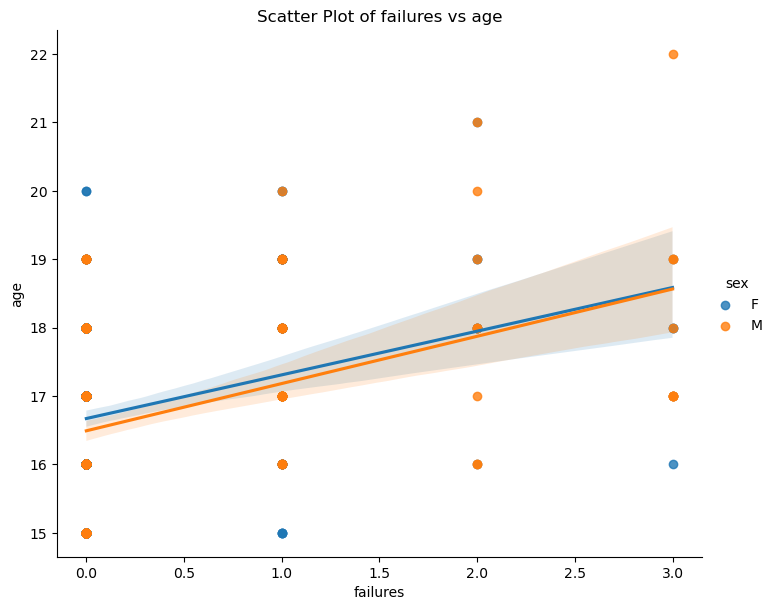

<Figure size 300x200 with 0 Axes>

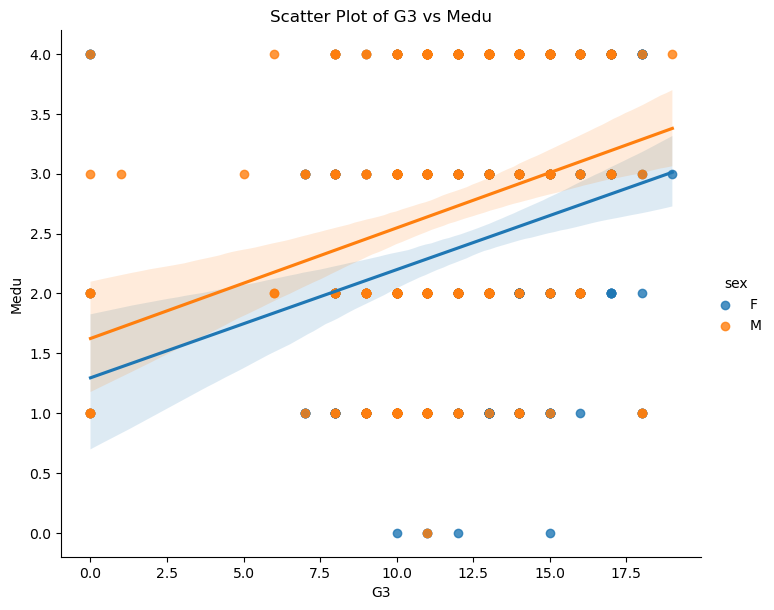

<Figure size 300x200 with 0 Axes>

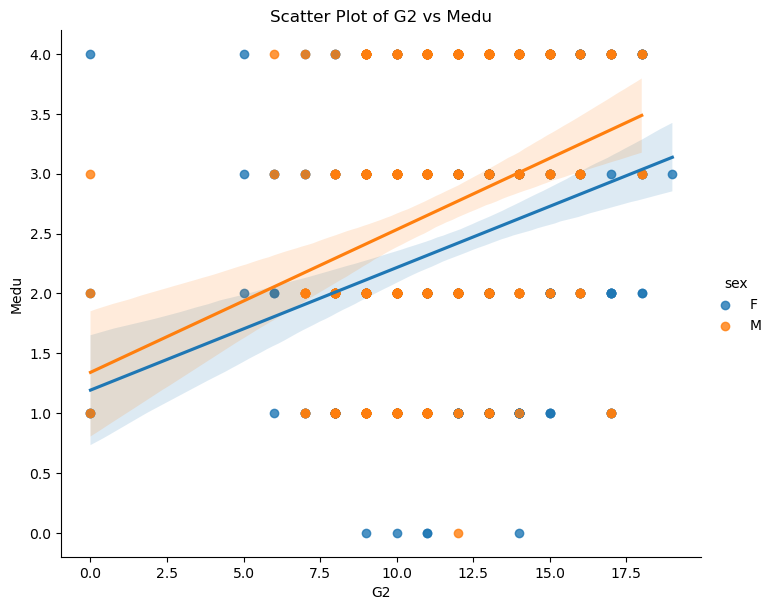

<Figure size 300x200 with 0 Axes>

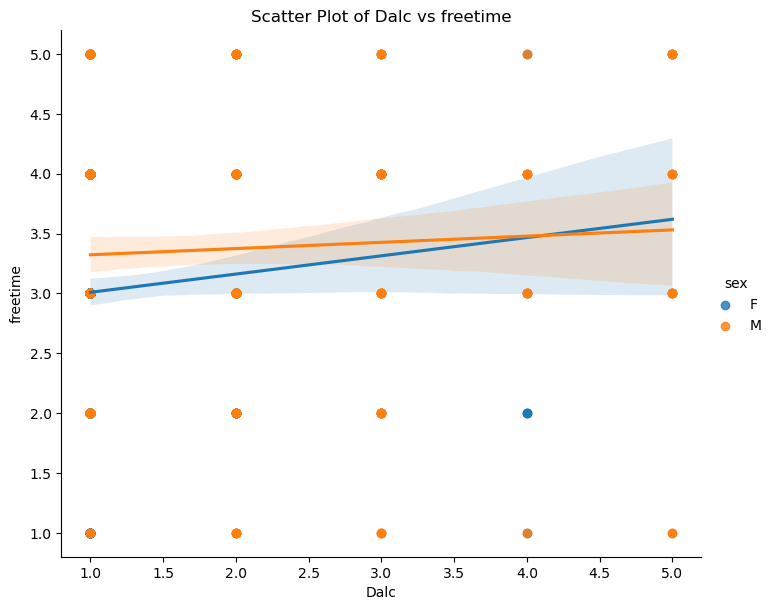

<Figure size 300x200 with 0 Axes>

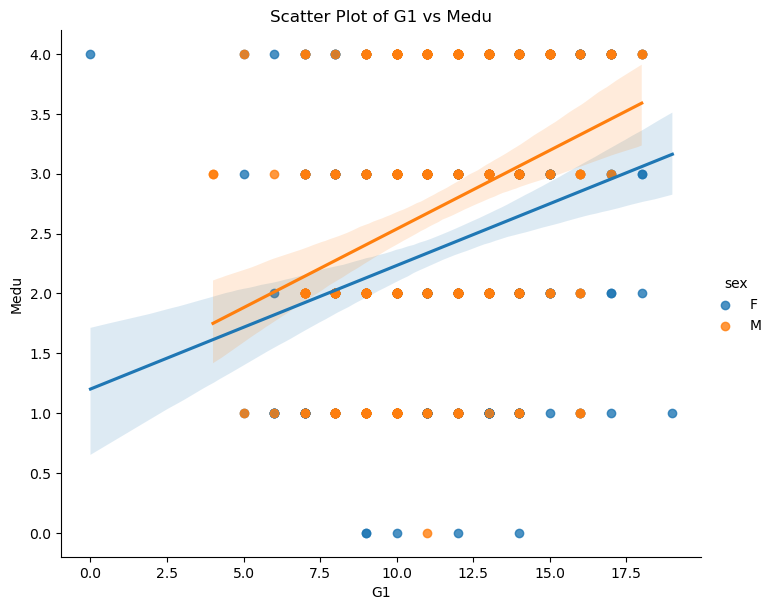

<Figure size 300x200 with 0 Axes>

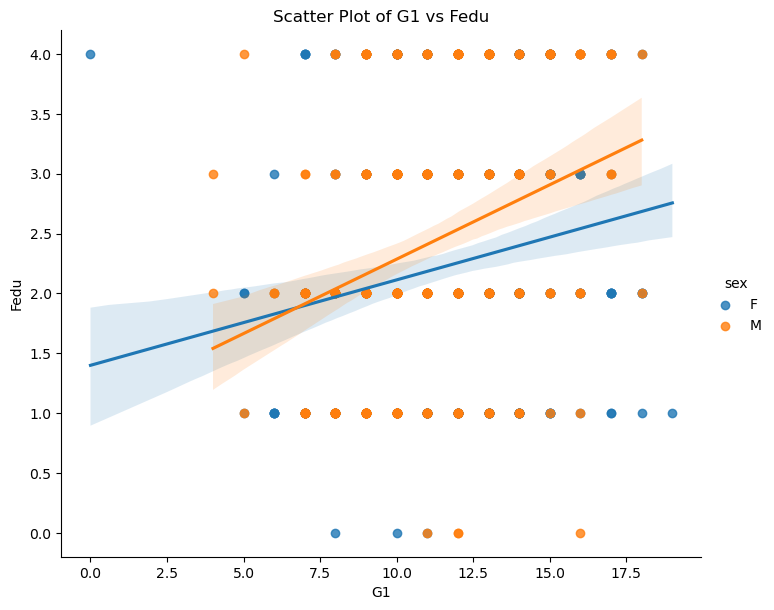

<Figure size 300x200 with 0 Axes>

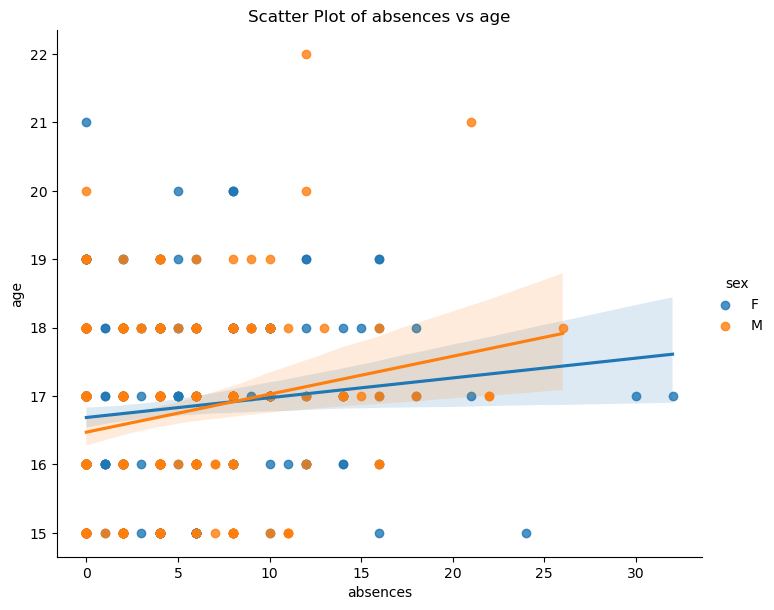

In [30]:
# Column to use for coloring the scatter plots
hue_column = 'sex'  

# Create scatter plots with regression lines for each pair
for pair in top_pairs:
    plt.figure(figsize=(3, 2))
    sns.lmplot(data=df, x=pair[0], y=pair[1], hue=hue_column, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

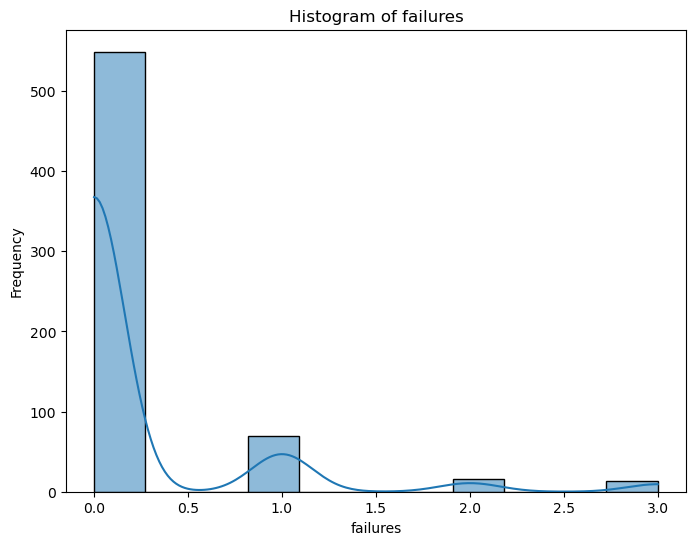

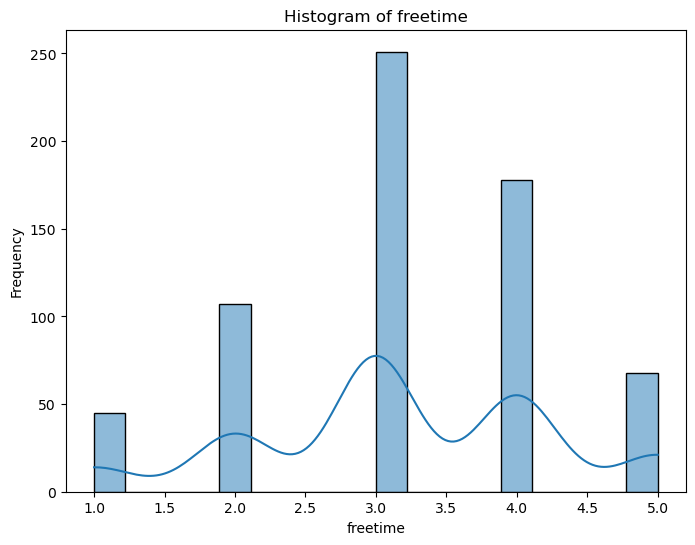

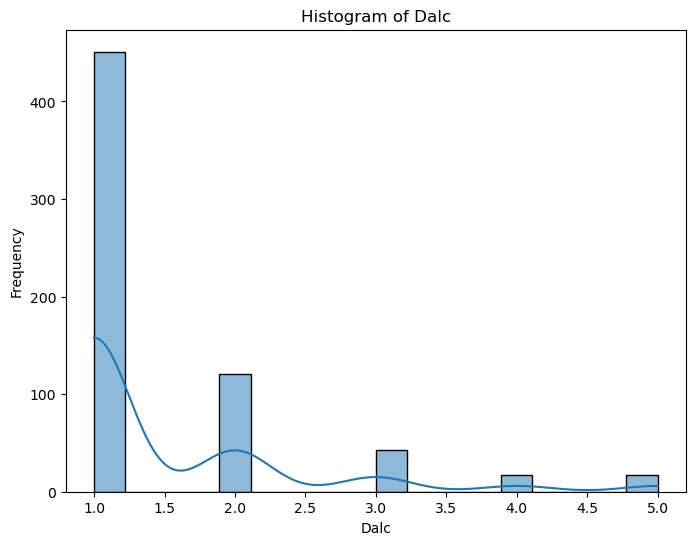

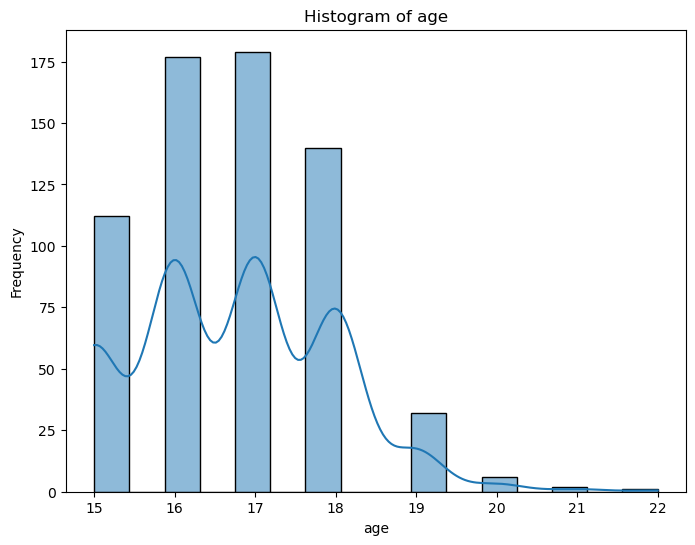

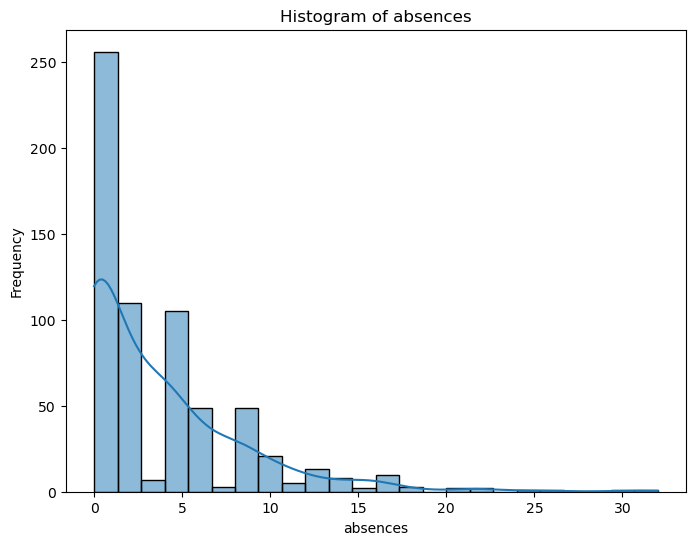

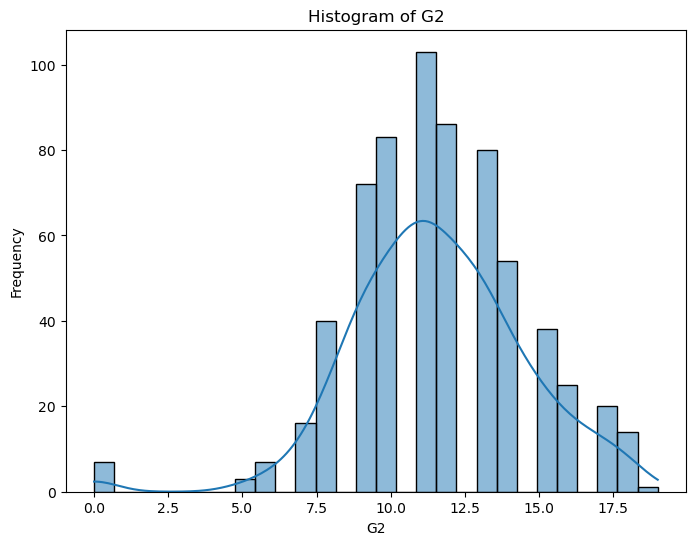

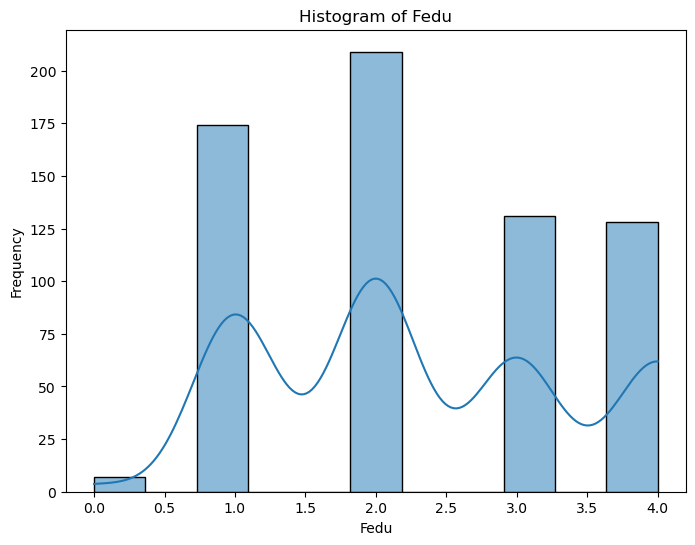

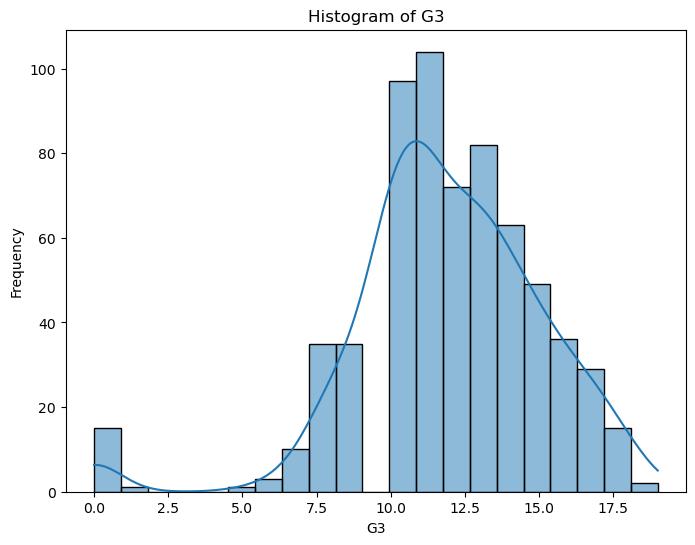

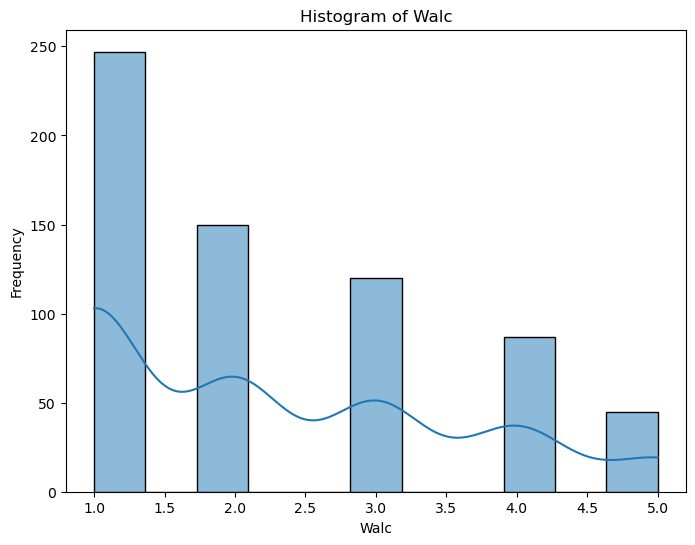

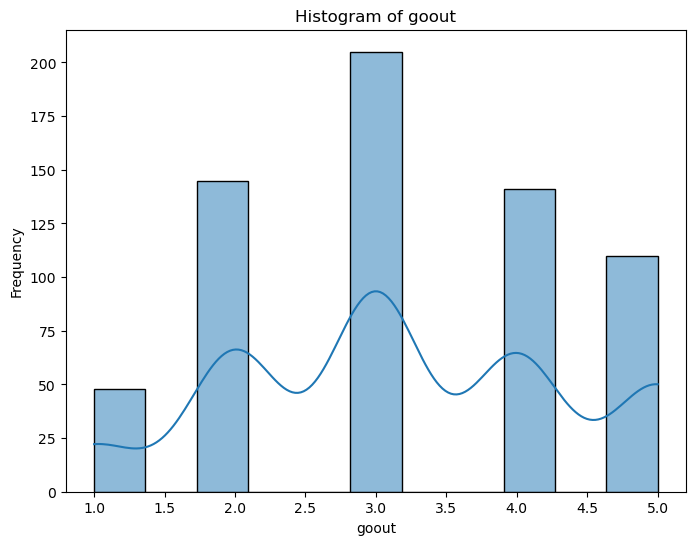

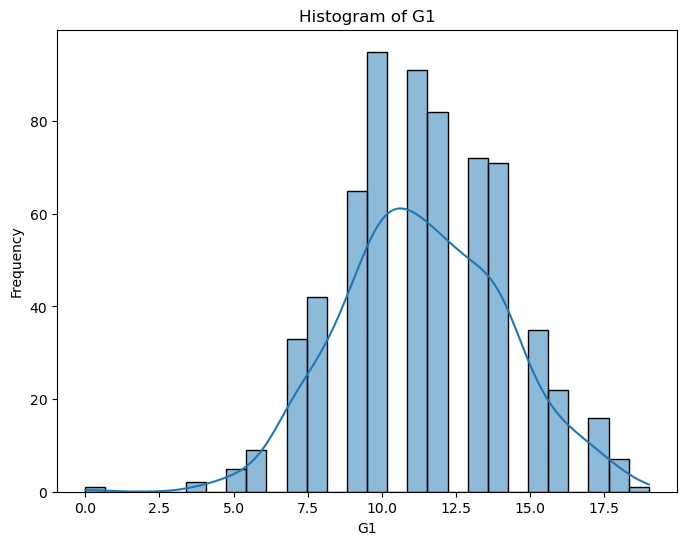

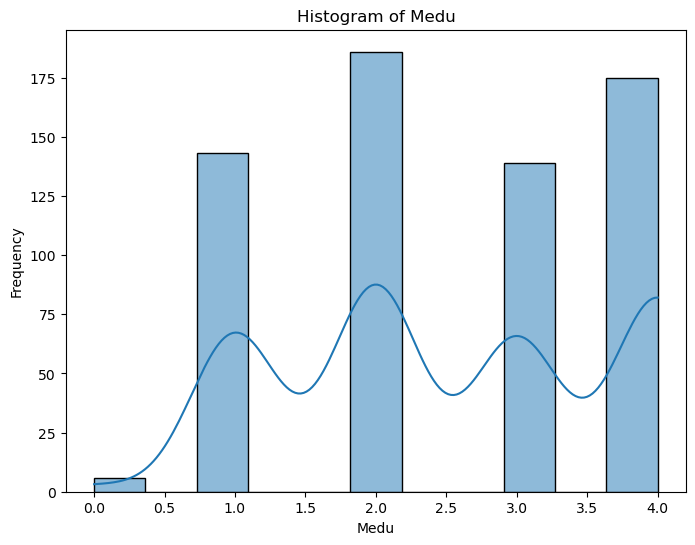

In [28]:
# Create histograms for each variable in the top correlated pairs
variables = set([var for pair in top_pairs for var in pair])

for var in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()